## Husky vs wolf classifier

In this question, you will train a convolutional neural network to distinguish between images of a [husky](https://en.wikipedia.org/wiki/Husky) and images of a [wolf](https://en.wikipedia.org/wiki/Wolf).

You will also use GradCam, a technique that helps explain the prediction of a convolutional neural network, to better understand your model.

Eventually, your model will be deployed to identify huskies and wolves in the wild. However, when it is, you find that it does not do as well as you expected. You will use the GradCam insight as well as some examples of misclassified samples "in the wild" to explain why, and what you might do to fix your model.

> Attribution: This question is adapted from material prepared by [Shaivi Malik](https://ucsc-ospo.github.io/author/shaivi-malik/) as part of the 2024 Summer of Reproducibility, under the mentorship of Fraida Fund and Mohamed Saeed. You may see the complete materials at: https://github.com/shaivimalik/covid_illegitimate_features/.

In this question, you will create a convolutional neural network using Tensorflow with Keras, then train the model to distinguish between "husky" and "wolf".

In [ ]:
import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation, Input, Conv2D, MaxPooling2D, Flatten, Rescaling
from tensorflow.keras import optimizers

First, we will use the `keras` utility function to read in data from the `data` directory, using `image_dataset_from_directory`. 

In [ ]:
image_size = (256,256)
batch_size = 4

train_ds = keras.utils.image_dataset_from_directory(
    'data/train', 
    label_mode="binary", 
    class_names = ["husky", "wolf"],
    image_size=image_size, 
    batch_size=batch_size,
    seed=27,
    validation_split=0.125,
    subset='training'
)
val_ds = keras.utils.image_dataset_from_directory(
    'data/train', 
    label_mode="binary", 
    class_names = ["husky", "wolf"],
    image_size=image_size, 
    batch_size=batch_size,
    seed=27,
    validation_split=0.125,
    subset='validation'
)
test_ds = keras.utils.image_dataset_from_directory(
    'data/test', 
    label_mode="binary", 
    class_names = ["husky", "wolf"],
    image_size=image_size, 
    batch_size=batch_size,
    seed=27,
    shuffle=False
)

Found 80 files belonging to 2 classes.
Using 70 files for training.
Found 80 files belonging to 2 classes.
Using 10 files for validation.
Found 20 files belonging to 2 classes.


Next, you will create a model and compile it. While the details are up to you, your  model must:

* be a `Sequential` type model
* accept as input images that are `(256, 256, 3)`
* have a `Rescaling` layer immediately after the input
* have one or more convolutional layers with non-linear activation
* have one or more max pooling layers following a convolution + activation
* end with a dense layer 
* use appropriate activation and loss function at the output
* have fewer than 250,000 parameters
* use the `accuracy` metric (when you compile it)

In [ ]:
model = Sequential([
    Input(shape=(256, 256, 3)),
    Rescaling(1./255),

    Conv2D(4, (3, 3), activation='relu'),
    MaxPooling2D(),

    Conv2D(8, (3, 3), activation='relu'),
    MaxPooling2D(),

    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(),

    Flatten(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 254, 254, 4)       112       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 127, 127, 4)      0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 125, 125, 8)       296       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 62, 62, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 60, 60, 16)       

In [ ]:
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

Fit your model for no more than 20 epochs, using `train_ds` and/or `val_ds`. 

In [ ]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)


Epoch 1/20
18/18 [==============================] - 6s 244ms/step - loss: 0.7434 - accuracy: 0.5714 - val_loss: 0.6323 - val_accuracy: 0.7000
Epoch 2/20
18/18 [==============================] - 4s 206ms/step - loss: 0.5654 - accuracy: 0.8429 - val_loss: 0.5812 - val_accuracy: 0.7000
Epoch 3/20
18/18 [==============================] - 4s 229ms/step - loss: 0.3459 - accuracy: 0.8857 - val_loss: 0.2668 - val_accuracy: 0.8000
Epoch 4/20
18/18 [==============================] - 5s 231ms/step - loss: 0.1573 - accuracy: 0.9286 - val_loss: 0.1351 - val_accuracy: 1.0000
Epoch 5/20
18/18 [==============================] - 5s 228ms/step - loss: 0.2069 - accuracy: 0.9000 - val_loss: 0.1421 - val_accuracy: 1.0000
Epoch 6/20
18/18 [==============================] - 4s 224ms/step - loss: 0.0895 - accuracy: 0.9714 - val_loss: 0.0663 - val_accuracy: 1.0000
Epoch 7/20
18/18 [==============================] - 5s 235ms/step - loss: 0.1257 - accuracy: 0.9429 - val_loss: 0.0954 - val_accuracy: 1.0000
Epoch 

Then, evaluate the model on the test set:

In [ ]:
acc_ts = model.evaluate(test_ds)[1]

5/5 [==============================] - 0s 99ms/step - loss: 0.1499 - accuracy: 0.9500


Your model should achieve at least 80% accuracy on the test data.

Save your model as `model.keras`. The grader will evaluate your saved model file.

In [ ]:
if model.count_params() <= 250000:
    model.save("model.keras")
else:
    print("Your model is required to have fewer than 250,000 parameters.")

The grader will also evaluate your saved model on a separate, "blind" test set that is not available to you. (The test set will be read in by the grader using `image_dataset_from_directory` with exactly the same arguments as `test_ds` above, but with different images.) Click "Save and Grade" on the question page to get the results on the "blind" test set.

## Explain your model

To better understand your model performance, you will use GradCam, a technique that highlights the areas of an image that the model "focuses" on the most to make its prediction.

The following cell will sample random images from the test set, apply GradCam, and show the GradCam heatmap overlaid on top of the original image. Areas highlighted in red or yellow are especially relevant, according to the model.

You may run this more than once to sample different images.

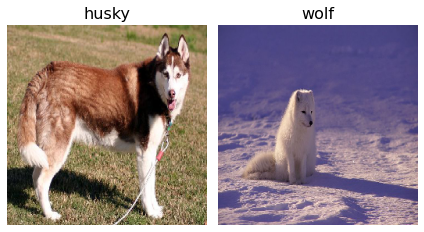

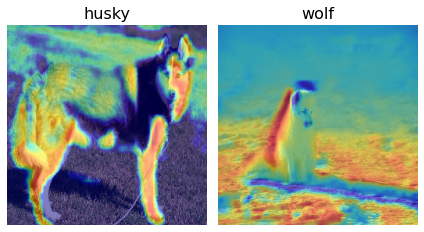

In [33]:
import matplotlib.pyplot as plt
from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam
import numpy as np
import os

# Define image titles for visualization
image_titles = ['husky', 'wolf']

# Create lists of file paths for husky and wolf images
husky_files = np.array(['data/test/husky/'+x for x in os.listdir('data/test/husky')])
wolf_files =  np.array(['data/test/wolf/'+x for x in os.listdir('data/test/wolf')])

# Load random images for each class and convert them to a numpy array
husky = keras.utils.load_img(np.random.choice(husky_files), target_size=image_size)
wolf = keras.utils.load_img(np.random.choice(wolf_files), target_size=image_size)
images = np.asarray([np.array(husky), np.array(wolf)])
X = np.array([keras.utils.img_to_array(img) for img in images])

# Render the original images
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(6, 6))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

# Define a function to modify the model for GradCAM
def model_modifier_function(cloned_model):
    cloned_model.layers[-1].activation = keras.activations.linear

# Define a score function for GradCAM
def score_function(output):
    if output.shape[1] == 1:
        return (output[0], output[1])
    elif output.shape[1] == 2:
        return (output[0,0], output[1,1])

# Create Gradcam object
gradcam = Gradcam(model, model_modifier=model_modifier_function, clone=True)

# Generate heatmap with GradCAM
cam = gradcam(score_function, X)

# Render the images with GradCAM heatmaps overlaid
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(6, 6))
for i, title in enumerate(image_titles):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
    ax[i].axis('off')
plt.tight_layout()
plt.show()